<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from pprint import pprint

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()


In [3]:
# A:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [4]:
# A:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

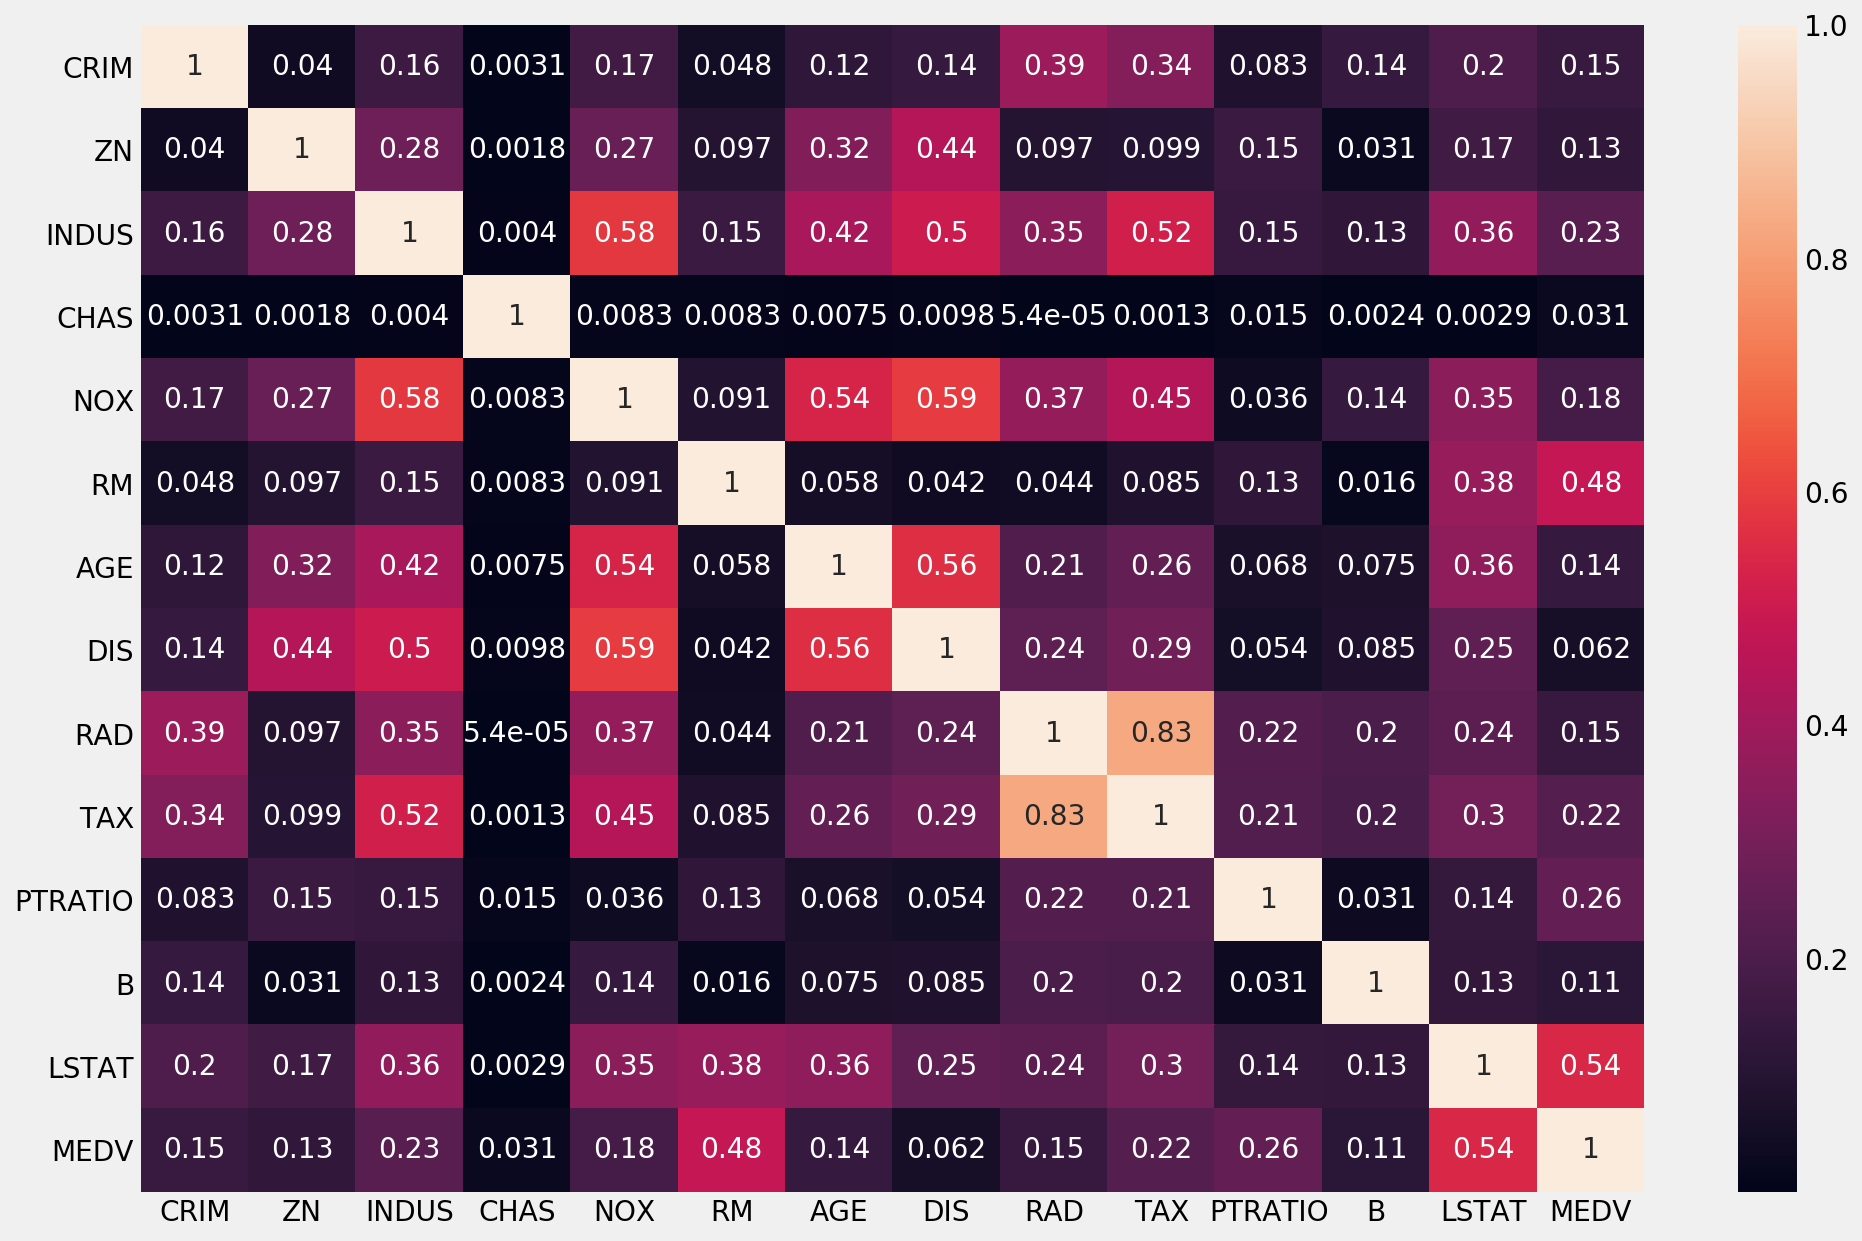

In [9]:
# Correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()**2, annot=True)
plt.show()

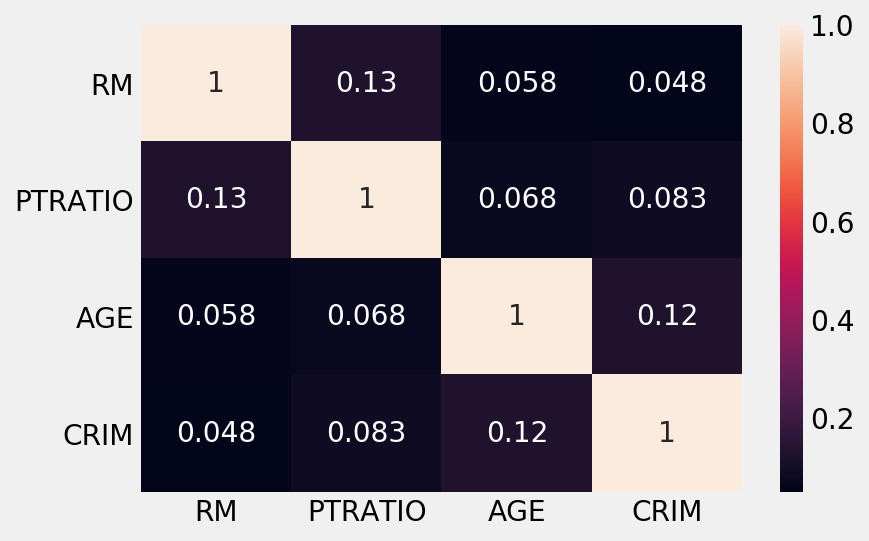

In [10]:
# select 4 predictors
sns.heatmap(df[['RM','PTRATIO','AGE','CRIM']].corr()**2, annot=True)

In [11]:
lm = LinearRegression()
X = df[['RM','PTRATIO','AGE','CRIM']]
y = df[['MEDV']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 142, test_size = 0.5)

In [13]:
model = lm.fit(X_train, y_train)

In [14]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.55782667637
0.63901402562


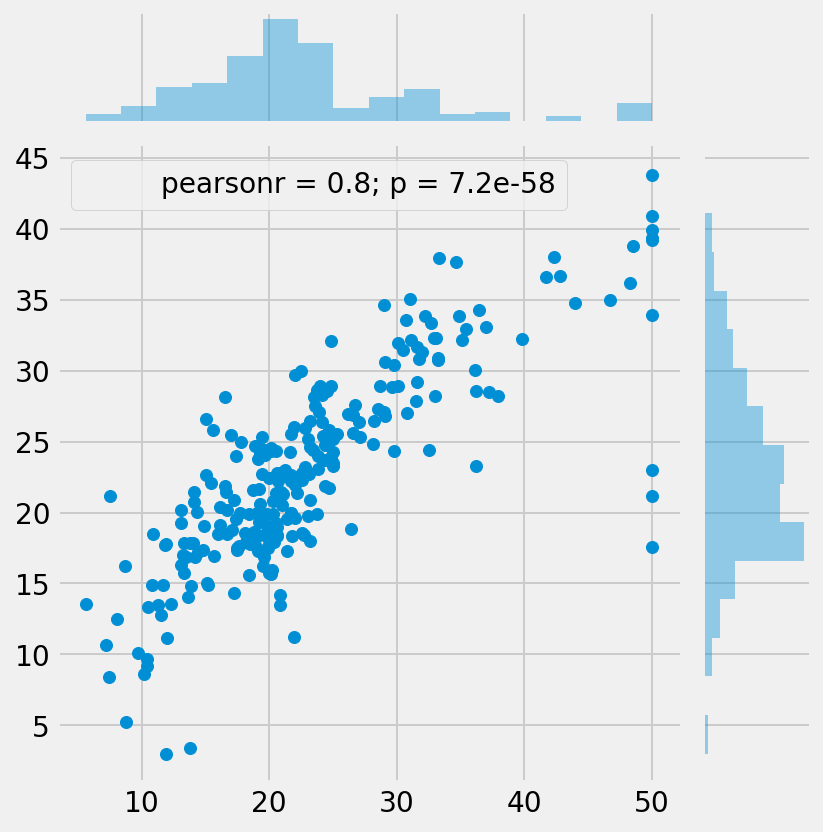

In [15]:
# plot predictions
predictions = model.predict(X_test)
plt.figure(figsize=(15,10))
sns.jointplot(y_test.values, predictions)

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [16]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 142, test_size = 0.1)

In [17]:
model = lm.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.613355413321
0.502900424167


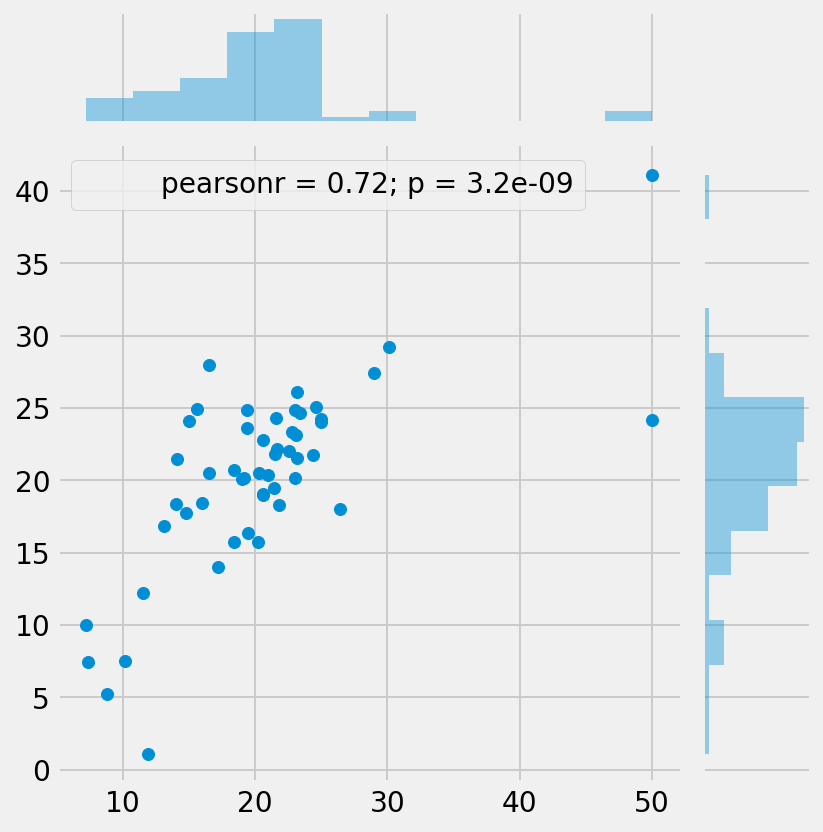

In [18]:
predictions = model.predict(X_test)
plt.figure(figsize=(15,10))
sns.jointplot(y_test.values, predictions)

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [42]:
# A:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn import metrics

In [20]:
for folds in range(5,11):
    print '------------------------------------\n'
    print 'K:', folds
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=folds)
    print "Cross-validated scores:", scores
    print "Mean CV R2:", np.mean(scores)
    print 'Std CV R2:', np.std(scores)
    
    # Make cross-validated predictions
    predictions = cross_val_predict(model, X, y, cv=folds)
    print(len(predictions))
    r2 = metrics.r2_score(y, predictions)
    print "Cross-Predicted R2:", r2

------------------------------------

K: 5
Cross-validated scores: [ 0.73779745  0.69141228  0.66997802 -0.09911421 -0.52658739]
Mean CV R2: 0.294697229488
Std CV R2: 0.514616784992
506
Cross-Predicted R2: 0.52554501029
------------------------------------

K: 6
Cross-validated scores: [ 0.69514336  0.69194979  0.61515365  0.77576085 -0.70095168 -0.39224613]
Mean CV R2: 0.280801640452
Std CV R2: 0.593623146267
506
Cross-Predicted R2: 0.429556434384
------------------------------------

K: 7
Cross-validated scores: [ 0.69813121  0.7204959   0.60593601  0.68445522  0.43260592 -0.87087372
 -0.11614539]
Mean CV R2: 0.307800735745
Std CV R2: 0.552657031214
506
Cross-Predicted R2: 0.435026327022
------------------------------------

K: 8
Cross-validated scores: [ 0.70133208  0.77269894  0.64447782  0.7451723   0.7604366  -0.77240963
 -1.63511661 -0.01678523]
Mean CV R2: 0.149975784945
Std CV R2: 0.846196668675
506
Cross-Predicted R2: 0.539090473756
------------------------------------

K: 9


### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [21]:
# A:
from itertools import combinations

In [22]:
combs = []
for i in range(1, len(boston.feature_names)+1):
    for c in combinations(boston.feature_names.tolist(), i):
        combs.append(c)

In [23]:
print(len(boston.feature_names))
print(len(combs))

13
8191


In [24]:
r2_score={}
linregmodel = LinearRegression()
for i,c in enumerate(combs):
    subX = df[list(c)]
    r2_score[c] = np.mean(cross_val_score(linregmodel, subX, y))

In [25]:
r2_score = r2_score.items()
r2_score = sorted(r2_score, key=lambda x:x[1], reverse=True)

In [26]:
pprint(r2_score[:5])

[(('ZN', 'NOX', 'DIS', 'PTRATIO', 'LSTAT'), 0.50451483832364019),
 (('ZN', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'), 0.50276699957953175),
 (('NOX', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'), 0.50153938043615232),
 (('ZN', 'CHAS', 'NOX', 'DIS', 'PTRATIO', 'LSTAT'), 0.50105473811932055),
 (('ZN', 'CHAS', 'NOX', 'AGE', 'DIS', 'PTRATIO', 'LSTAT'),
  0.49868367301205924)]


### 5.1 Can you explain what could be wrong with this approach?

In [27]:
# A:
# These scores can be just by chance since the data is a random sample from overall population
# There is a chance that some variables might not make sense to be included as a feature.

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [28]:
import patsy

# A:

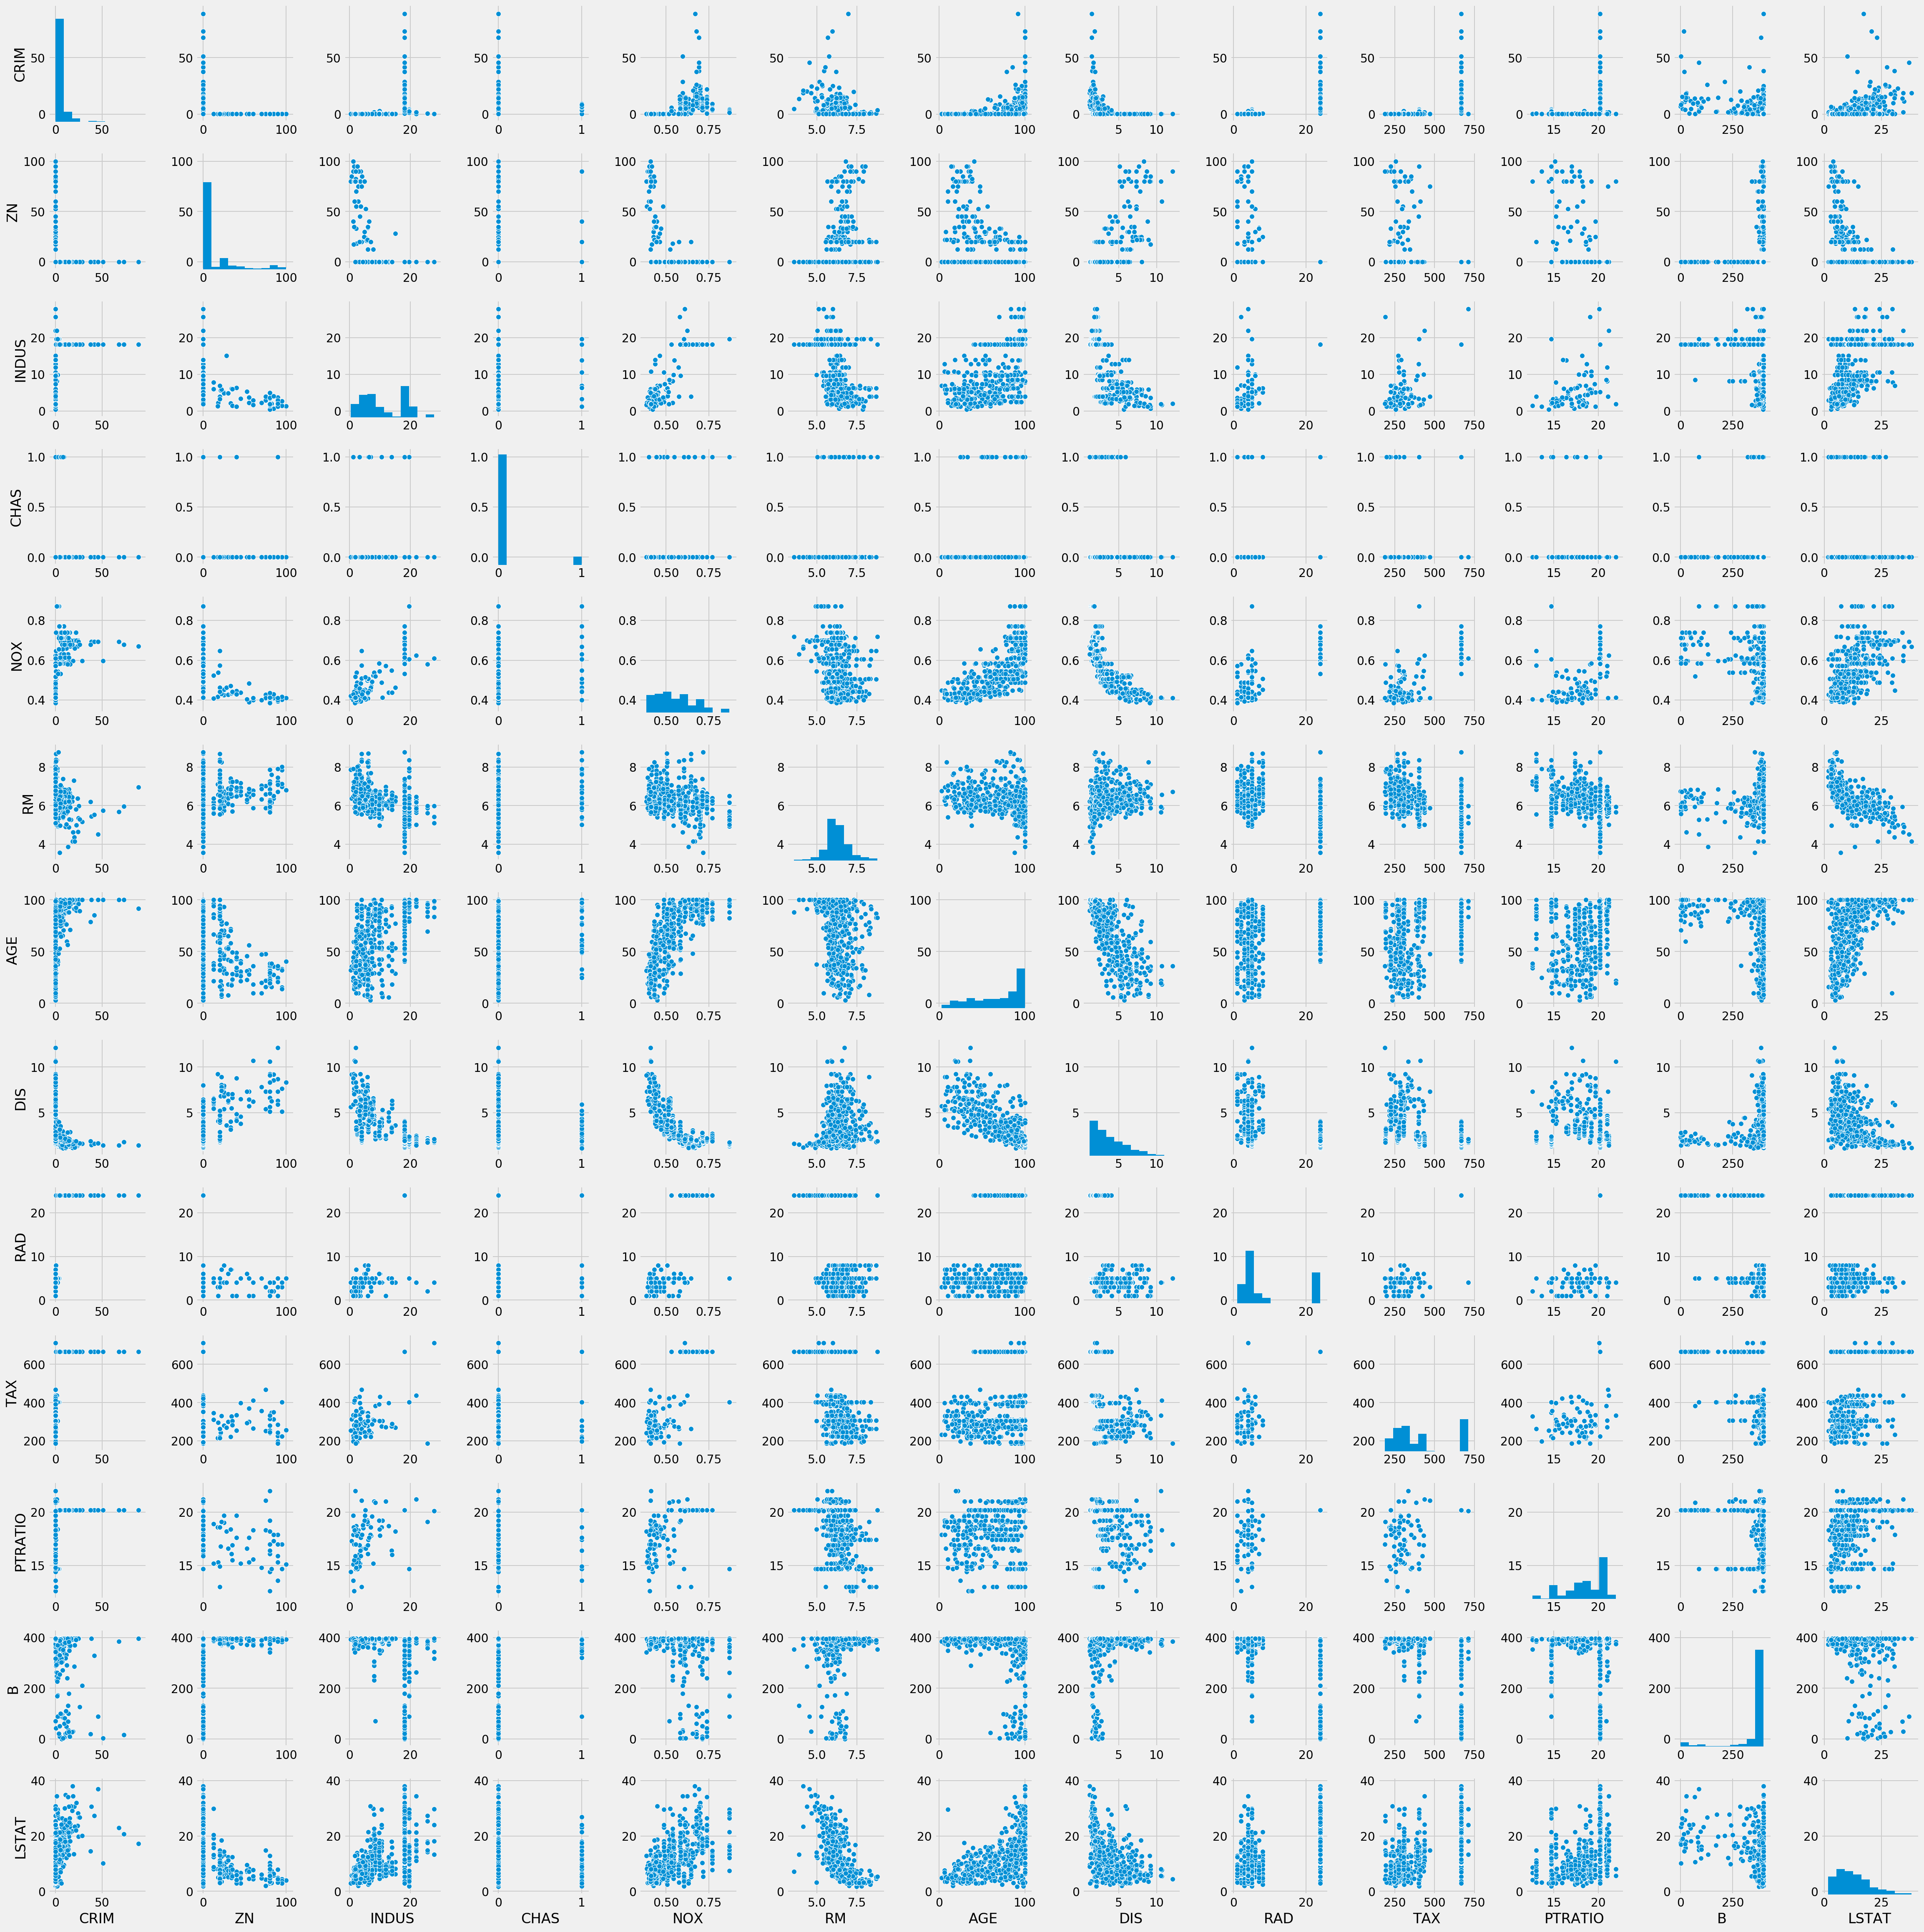

In [29]:
sns.pairplot(df[boston.feature_names.tolist()])

In [30]:
# predict LSTAT with NOX, RM, AGE, DIS
formula = 'LSTAT ~ NOX + RM + AGE + DIS + MEDV'
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

In [31]:
# split to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [32]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [33]:
print'Training R2 Score: ', model.score(X_train, y_train)
print'Test R2 Score: ', model.score(X_test, y_test)

Training R2 Score:  0.70625452533
Test R2 Score:  0.672775899595


In [34]:
# plot the predictions against test
predictions = model.predict(X_test)
r2_score = metrics.r2_score(y_test, predictions)
# print(len(y_test))
# print(len(predictions))
print(r2_score)

0.672775899595


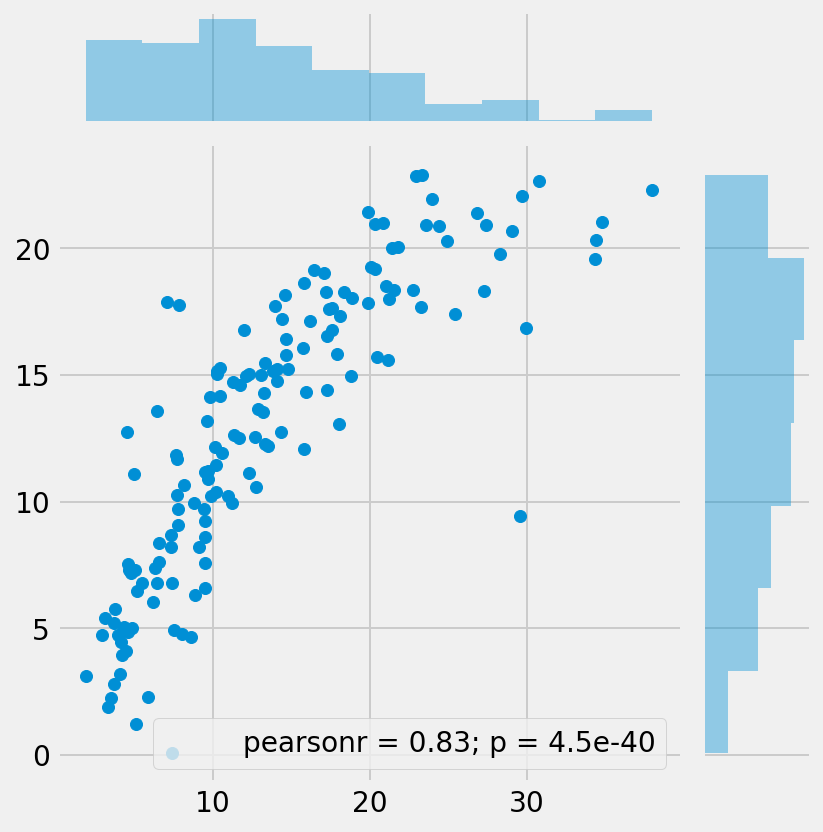

In [35]:
sns.jointplot(x=y_test.values, y=predictions)

In [36]:
import statsmodels.api as sm

/Users/david.yan/anaconda/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [37]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LSTAT   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     167.3
Date:                Mon, 25 Dec 2017   Prob (F-statistic):           2.78e-90
Time:                        11:26:05   Log-Likelihood:                -962.02
No. Observations:                 354   AIC:                             1936.
Df Residuals:                     348   BIC:                             1959.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.1855      3.110      7.778      0.000      18.070      30.302
NOX            5.3190      2.967      1.793      0.074      -0.516      11.154
RM            -1.6406      0.418     -3.927      0.000      -2.462      -0.819
AGE            0.0639      0.012      5.361      0.000       0.040       0.087
DIS           -0.2601      0.170     -1.530      0.127      -0.594       0.074
MEDV          -0.3443      0.035     -9.790      0.000      -0.413      -0.275
==============================================================================
Omnibus:                       32.408   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.457
Skew:                           0.692   Prob(JB):                     9.95e-10
Kurtosis:                       3.946   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# from the summary, RM should not be used
X_train = X_train.drop(labels='NOX', axis=1)

In [39]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LSTAT   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     207.1
Date:                Mon, 25 Dec 2017   Prob (F-statistic):           8.92e-91
Time:                        11:26:05   Log-Likelihood:                -963.65
No. Observations:                 354   AIC:                             1937.
Df Residuals:                     349   BIC:                             1957.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.5102      2.504     10.986      0.000      22.585      32.435
RM            -1.6104      0.419     -3.845      0.000      -2.434      -0.787
AGE            0.0696      0.012      6.049      0.000       0.047       0.092
DIS           -0.4133      0.147     -2.805      0.005      -0.703      -0.124
MEDV          -0.3610      0.034    -10.612      0.000      -0.428      -0.294
==============================================================================
Omnibus:                       34.488   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.872
Skew:                           0.734   Prob(JB):                     2.97e-10
Kurtosis:                       3.906   Cond. No.                         966.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X_test = X_test.drop(labels='NOX',axis=1)

0.671285644727


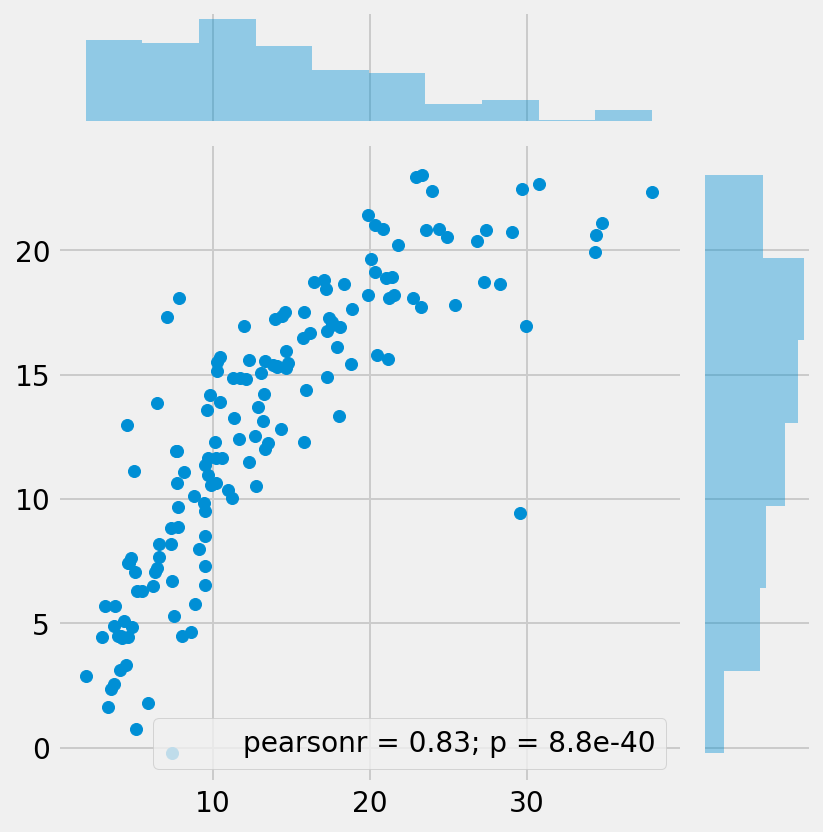

In [41]:
yhat = model.predict(X_test)
y_true = y_test.values.ravel()
sns.jointplot(x=y_true, y=yhat.values)
print(metrics.r2_score(y_true, yhat.values))


In [62]:
# Cross validation
linregmodel = LinearRegression()
kf_shuffle = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(linregmodel, X[X_test.columns.tolist()], y, cv=kf_shuffle)
predictions = cross_val_predict(linregmodel, X[X_test.columns.tolist()], y, cv=kf_shuffle)

In [63]:
# Very strong Model hahahah
print(scores)
print(scores.mean())
print(scores.std())

[ 0.64592455  0.74937823  0.65647921  0.6787254   0.67115648]
0.680332775533
0.0363510163167


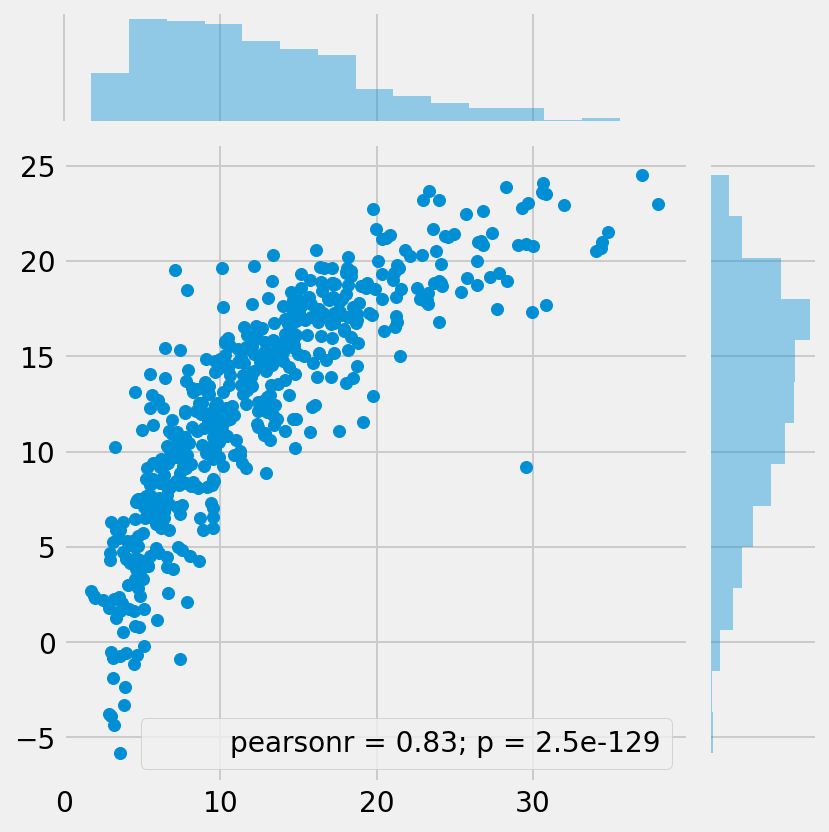

In [64]:
# plot 
sns.jointplot(x=y.values, y=predictions)